# Create category and label OR match/mismatch plot

## Label OR match/mismatch plot

In [1]:
# Load label OR data
import pandas as pd


label_fpath = '/projects/websci2020_tumblr_identity/output/coefficients_viz/label_plot.csv'
label_data = pd.read_csv(label_fpath)

def get_match_diff(category):
    return label_data.loc[(label_data['model_category']==category) & (label_data['match']=='match'), 'odds_ratio'].values[0] - \
        label_data.loc[(label_data['model_category']==category) & (label_data['match']=='mismatch'), 'odds_ratio'].values[0]
    
label_data['odds_ratio-1'] = label_data['odds_ratio'] - 1
label_data['category_match-mismatch'] = label_data['model_category'].map(lambda x: get_match_diff(x))
label_data_match_sorted = label_data.sort_values('category_match-mismatch', ascending=False)
label_data_match_sorted

,model_category,feature_weight,odds_ratio,match,odds_ratio-1,category_match-mismatch
8,relationship status,0.463,1.589,match,0.589,0.860
19,relationship status,-0.316,0.729,mismatch,-0.271,0.860
0,age,0.234,1.264,match,0.264,0.486
11,age,-0.251,0.778,mismatch,-0.222,0.486
20,sexual orientation,-0.089,0.915,mismatch,-0.085,0.259
9,sexual orientation,0.160,1.174,match,0.174,0.259
1,ethnicity/nationality,0.004,1.004,match,0.004,0.241
12,ethnicity/nationality,-0.270,0.763,mismatch,-0.237,0.241
7,pronouns,0.019,1.019,match,0.019,0.233
18,pronouns,-0.241,0.786,mismatch,-0.214,0.233


In [7]:
# Find available plot fonts
import matplotlib as mpl
font_paths = mpl.font_manager.findSystemFonts()
font_objects = mpl.font_manager.createFontList(font_paths)
font_names = [f.name for f in font_objects]
print(font_names)

['Accanthis ADF Std', 'IPAexMincho', 'Waree', 'Waree', 'Liberation Sans', 'STIXIntegralsUpD', 'Lato', 'Roboto', 'FreeSans', 'STIXGeneral', 'EB Garamond', 'KacstTitleL', 'FreeSerif', 'Universalis ADF Cd Std', 'Norasi', 'Noto Sans CJK JP', 'Gentium Basic', 'IPAGothic', 'STIXIntegralsUpD', 'Tlwg Typewriter', 'Khmer OS', 'Gentium Basic', 'STIXNonUnicode', 'STIX', 'Lato', 'IPAPMincho', 'EB Garamond', 'Tlwg Typo', 'Sawasdee', 'FreeSans', 'Gentium', 'Norasi', 'Lato', 'STIXVariants', 'Padauk', 'rsfs10', 'Accanthis ADF Std', 'FreeSerif', 'Ubuntu', 'EB Garamond Initials', 'Linux Libertine O', 'Roboto', 'DejaVu Sans', 'Accanthis ADF Std', 'Ubuntu', 'KacstFarsi', 'Gillius ADF No2 Cd', 'GFS Porson', 'Accanthis ADF Std No3', 'KacstTitle', 'IPAPGothic', 'Amiri', 'KacstQurn', 'Linux Libertine O', 'Accanthis ADF Std No2', 'Amiri', 'Lobster Two', 'Universalis ADF Std', 'Tlwg Typewriter', 'STIX Math', 'Gentium Book Basic', 'FreeSerif', 'Carlito', 'GFS Baskerville', 'Linux Libertine Display O', 'FreeMono'

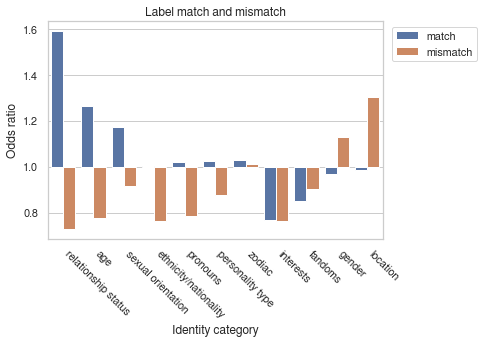

In [2]:
# label bar plot

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
sns.set_style('whitegrid', {'font.sans-serif': ['FreeSans', 'DejaVu Sans', 'Arial', 'sans-serif']})
sns.barplot(x='model_category', y='odds_ratio-1', hue='match', data=label_data_match_sorted, bottom=1.0)

plt.title("Label match and mismatch")
plt.ylabel('Odds ratio')
plt.xlabel('Identity category')
plt.xticks(rotation=-45, ha='left')
plt.legend(loc='upper right', bbox_to_anchor=((1.3, 1)))

outpath = '/projects/websci2020_tumblr_identity/output/coefficients_viz/label_plot.pdf'
plt.savefig(outpath, dpi=200, bbox_inches='tight')

## Category OR match/mismatch plot

In [3]:
# Load category OR data
import pandas as pd


category_fpath = '/projects/websci2020_tumblr_identity/output/coefficients_viz/category_plot.csv'
category_data = pd.read_csv(category_fpath)

def get_match_diff(category):
    return category_data.loc[(category_data['model_category']==category) & (category_data['match']=='match'), 'odds_ratio'].values[0] - \
        category_data.loc[(category_data['model_category']==category) & (category_data['match']=='mismatch'), 'odds_ratio'].values[0]
    
category_data['odds_ratio-1'] = category_data['odds_ratio'] - 1
category_data['category_match-mismatch'] = category_data['model_category'].map(lambda x: get_match_diff(x))
category_data_match_sorted = category_data.sort_values('category_match-mismatch', ascending=False)
category_data_match_sorted

,model_category,feature_weight,odds_ratio,match,odds_ratio-1,category_match-mismatch
2,fandoms,0.412,1.509,match,0.509,0.445
13,fandoms,0.062,1.064,mismatch,0.064,0.445
21,zodiac,0.058,1.060,mismatch,0.060,0.418
10,zodiac,0.391,1.478,match,0.478,0.418
20,sexual orientation,0.008,1.008,mismatch,0.008,0.360
9,sexual orientation,0.313,1.368,match,0.368,0.360
5,location,0.392,1.480,match,0.480,0.350
16,location,0.122,1.130,mismatch,0.130,0.350
6,personality type,0.289,1.335,match,0.335,0.294
17,personality type,0.041,1.041,mismatch,0.041,0.294


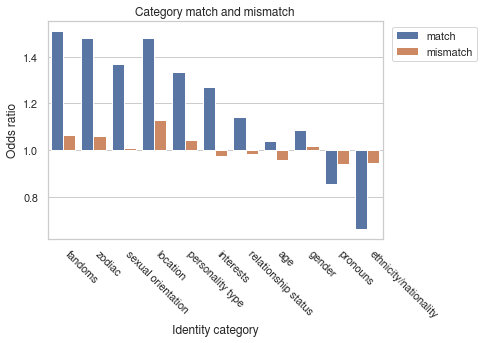

In [4]:
# category bar plot

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
sns.set_style('whitegrid', {'font.sans-serif': ['FreeSans', 'DejaVu Sans', 'Arial', 'sans-serif']})
sns.barplot(x='model_category', y='odds_ratio-1', hue='match', data=category_data_match_sorted, bottom=1.0)

plt.title("Category match and mismatch")
plt.ylabel('Odds ratio')
plt.xlabel('Identity category')
plt.xticks(rotation=-45, ha='left')
plt.legend(loc='upper right', bbox_to_anchor=((1.3, 1)))

outpath = '/projects/websci2020_tumblr_identity/output/coefficients_viz/category_plot.pdf'
plt.savefig(outpath, dpi=200, bbox_inches='tight')

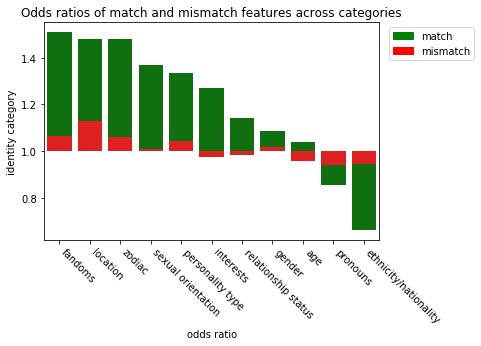

In [5]:
# category bar plot (old)

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig = plt.figure()
sns.barplot(x='model_category', y='match_odds_ratio-1', data=category_data_match_sorted, color='green', label='match', bottom=1.0)
sns.barplot(x='model_category', y='mismatch_odds_ratio-1', data=category_data_match_sorted, color='red', label='mismatch', bottom=1.0)

plt.title("Odds ratios of match and mismatch features across categories")
plt.xlabel('odds ratio')
plt.xticks(rotation=-45, ha='left')
plt.ylabel('identity category')
red_patch = mpatches.Patch(color='red', label='mismatch')
green_patch = mpatches.Patch(color='green', label='match')
# plt.legend(labels=['match', 'mismatch'])
plt.legend(loc='upper right', bbox_to_anchor=((1.3, 1)), handles=[green_patch, red_patch])
fig.set_facecolor('white')

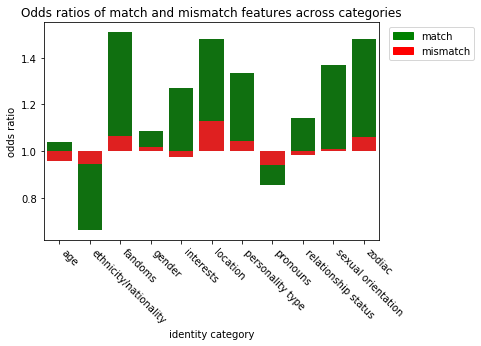

In [8]:
# bar plot

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig = plt.figure()
sns.barplot(x='model_category', y='match_odds_ratio-1', data=category_data, color='green', label='match', bottom=1.0)
sns.barplot(x='model_category', y='mismatch_odds_ratio-1', data=category_data, color='red', label='mismatch', bottom=1.0)

plt.title("Odds ratios of match and mismatch features across categories")
plt.ylabel('odds ratio')
plt.xlabel('identity category')
plt.xticks(rotation=-45, ha='left')
red_patch = mpatches.Patch(color='red', label='mismatch')
green_patch = mpatches.Patch(color='green', label='match')
# plt.legend(labels=['match', 'mismatch'])
plt.legend(loc='upper right', bbox_to_anchor=((1.3, 1)), handles=[green_patch, red_patch])
fig.set_facecolor('white')

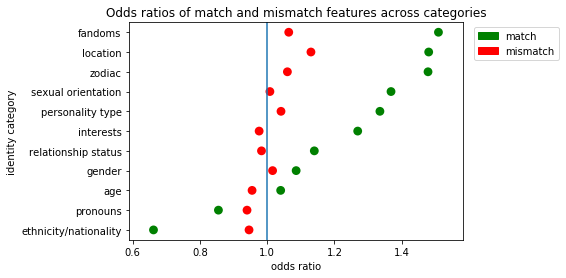

In [39]:
# point plot

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# fig, ax = plt.subplots()
# sns.pointplot(x='match_odds_ratio', y='model_category', data=category_data_match_sorted, color='blue', label='match', join=False, ax=ax)
# sns.pointplot(x='mismatch_odds_ratio', y='model_category', data=category_data_match_sorted, color='red', label='mismatch', join=False, ax=ax)
fig = plt.figure()
sns.pointplot(x='match_odds_ratio', y='model_category', data=category_data_match_sorted, color='green', label='match', join=False)
sns.pointplot(x='mismatch_odds_ratio', y='model_category', data=category_data_match_sorted, color='red', label='mismatch', join=False)
plt.axvline(1,0,1)
plt.title("Odds ratios of match and mismatch features across categories")
plt.xlabel('odds ratio')
plt.ylabel('identity category')
red_patch = mpatches.Patch(color='red', label='mismatch')
green_patch = mpatches.Patch(color='green', label='match')
# plt.legend(labels=['match', 'mismatch'])
plt.legend(loc='upper right', bbox_to_anchor=((1.3, 1)), handles=[green_patch, red_patch])
fig.set_facecolor('white')